<a href="https://colab.research.google.com/github/suranimayur/AppliedTimeSeriesAnalysisWithPython/blob/main/Hands_On_Implementation_Of_Naive_Bayes_Classification_In_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hands-On Implementation Of Naive Bayes Classification In Python**

In this implementation, we will apply a special case of the Naive Bayes classification technique, the Gaussian Naive Bayes Classifier which assumes that the data points drawn for the particular label are from simple Gaussian distribution (zero covariance between features), and highly supports continuous data. For this demonstration, we are using the popular Iris flower dataset which has 4 features for 3 different kinds of Iris flowers. The values of these 4 features are in continuous nature which represent the length and width of the flower’s sepals and petals respectively






Step 1: Reading the dataset

In [1]:
# Importing the required library
import pandas as pd

In [2]:
# Reading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Iris.csv')

In [3]:
# Checking top 5 rows of dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Checking the shape of the dataset

data.shape

(150, 6)

As we can see in the dataset, we have a record of different flowers with their sepal and petal dimensions and a class label indicating the category of flowers. Out of 150 records, let’s see how many records are there for each class and its percentage contribution.  

In [5]:
# Class label count

data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
data['Species'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

 As we can see in the above output,  there are 3 classes of Iris flower namely Iris-setosa, Iris-versicolor, and Iris-virginica. There are 50-50 records belonging to each of these three classes which means the data is equally distributed among the classes.

**Step 2: Defining and preprocessing input-output features**

After reading and inspecting the dataset, let’s define the input (X) features as sepal length, sepal width, petal length, and petal width of the flowers as shown in the above data frame and output (y) feature as the Species columns, the classes they belong to.

In [7]:
# Defining input (X) and output (y) features

X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

Next, we will define training and testing patterns using the train_test_split method. Out of 150 records, we are keeping 20% (30 records) for testing and the remaining 120 records (80%) will be used for training the classifier.

In [8]:
# Creating training and test patterns

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state = 0)

Now let’s check the size of training and testing to understand how many records will be used for training and testing.



In [9]:
# Checking shape of training and test sets

X_train.shape, X_test.shape

((120, 4), (30, 4))

Before using this training pattern to train the classifier, let’s see the distribution of these values.

In [10]:

# Input patterns

X_train[:11]

array([[6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.2],
       [5.2, 2.7, 3.9, 1.4],
       [5.7, 3.8, 1.7, 0.3],
       [6. , 2.7, 5.1, 1.6],
       [5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1]])

As we can see all feature values are not in the same range and hence only a few features can dominate the prediction. To avoid this dominance, let's use the MinMax scalar function from the sklearn library which scales down all the values in the range of between 0 and 1. Here we will scale both training and testing patterns. Here we are not using standard scaling or z-standardization because the Naive Bayes classifier does not work on negative values.

In [12]:
# Min-Max Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train[:11]

array([[0.58333333, 0.45833333, 0.75862069, 0.70833333],
       [0.30555556, 0.41666667, 0.5862069 , 0.58333333],
       [0.25      , 0.625     , 0.06896552, 0.04166667],
       [0.5       , 0.41666667, 0.65517241, 0.70833333],
       [0.58333333, 0.33333333, 0.77586207, 0.875     ],
       [0.25      , 0.29166667, 0.48275862, 0.54166667],
       [0.38888889, 0.75      , 0.10344828, 0.08333333],
       [0.47222222, 0.29166667, 0.68965517, 0.625     ],
       [0.44444444, 0.41666667, 0.53448276, 0.58333333],
       [0.41666667, 0.25      , 0.5       , 0.45833333],
       [0.69444444, 0.41666667, 0.75862069, 0.83333333]])

**Step 3: Initializing and training Gaussian Naive Bayes Classifier**

Here we will import the Gaussian Naive Bayes classifier from the sklearn library and after initializing it, will train using the above-scaled training patterns.

In [15]:
# Defining the Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
# Training the SVM classifier
classifier.fit(X_train, y_train)

GaussianNB()

**Step 4: Predicting and evaluating the classifier**

After training the classifier, we will use it to predict the class label of the iris flower using testing patterns which are defined in step 2

In [16]:
# Making predictions with the test data
y_pred = classifier.predict(X_test)

Now let’s compare the predicted labels of flowers with original labels.


In [17]:
# Combining the actual and predicted values
pd.DataFrame(data={'Actual Labels': y_test, 'Predicted Labels': y_pred}).head()

,Actual Labels,Predicted Labels
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa


In the 5 comparisons above, we can see all the predicted labels have matched the actual labels but there might be a few labels that predicted inaccurately. Let's check those labels by using a confusion matrix.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


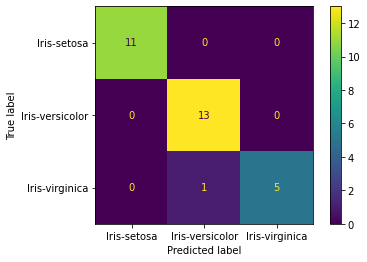

In [18]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)

So out of 30 records, 11+13+5=29 records predicted correctly and one record is wrongly predicted which is originally Iris-virginica predicted as Iris-versicolor. Let's obtain the accuracy of this classifier.

In [21]:
# Accuracy score
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test, y_pred),4)

0.9667

The model has around 96% accuracy in predicting the type of Iris flower. Finally, let's obtain the classification report for analyzing the performance of this classifier.

In [22]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



From the above report, we can conclude that the Gaussian Naive Bayes classifier has performed well on predicting the class labels of the Iris flowers